# Explore here

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
Artist_Id = "1qto4hHid1P71emI6Fd8xi"
Artist_Name ="Aventura"

results = sp.search(q='artist:' + Artist_Name, type='artist')
artist = results['artists']['items'][0]
artist_id = artist['id']

# Las canciones más populares del artista
top_tracks = sp.artist_top_tracks(Artist_Id)

#Top 10 de canciones
for idx, track in enumerate(top_tracks['tracks'][:10]):
    print(f"{idx + 1}. {track['name']}")


1. Ella Y Yo - Featuring Don Omar
2. Dile al Amor
3. El Perdedor
4. Obsesion
5. Los Infieles
6. El Malo
7. Volví
8. Un Beso
9. Enseñame a Olvidar
10. Por un Segundo


In [4]:
import pandas as pd

def get_all_tracks(artist_id):
    all_tracks = []
    results = sp.artist_top_tracks(artist_id)
    all_tracks.extend(results['tracks'])
    return all_tracks
# Obtén todos los tracks del artista
all_tracks = get_all_tracks(artist_id)
# Crea un DataFrame con los tracks
tracks_data = {
    "name": [track['name'] for track in all_tracks],
    "album": [track['album']['name'] for track in all_tracks],
    "release_date": [track['album']['release_date'] for track in all_tracks],
    "popularity": [track['popularity'] for track in all_tracks],
    "duration_ms": [track['duration_ms'] for track in all_tracks]
}


df = pd.DataFrame(tracks_data)
df['duration_min'] = df['duration_ms'] / 60000

df

,name,album,release_date,popularity,duration_ms,duration_min
0,Ella Y Yo - Featuring Don Omar,God's Project,2005-04-26,79,267786,4.463100
1,Dile al Amor,The Last,2009-06-09,79,229360,3.822667
2,El Perdedor,K.O.B. Live,2006-12-19,79,215213,3.586883
3,Obsesion,We Broke The Rules,2002-06-01,77,254720,4.245333
4,Los Infieles,K.O.B. Live,2006-12-19,77,257186,4.286433
5,El Malo,The Last,2009-06-09,76,238720,3.978667
6,Volví,Volví,2021-08-03,76,230125,3.835417
7,Un Beso,God's Project,2005-04-26,75,263346,4.389100
8,Enseñame a Olvidar,We Broke The Rules,2002-06-01,73,348826,5.813767
9,Por un Segundo,The Last,2009-06-09,73,255026,4.250433


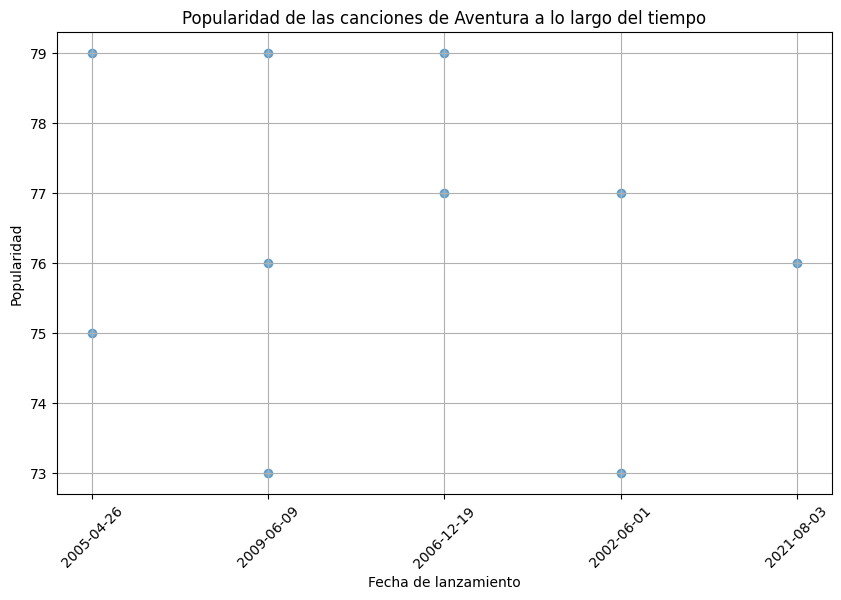

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['release_date'], df['popularity'], alpha=0.6)
plt.title('Popularidad de las canciones de Aventura a lo largo del tiempo')
plt.xlabel('Fecha de lanzamiento')
plt.ylabel('Popularidad')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

En esta gráfica podemos observa que los años en los que el grupo estaba unido desde 2005 hasta 2013 fueron las canciones con más popularidad, ya que el grupo estaba activo y seguía juntos. El grupo se separó en 2013 y la popularidad de las canciones, inlcuso de las más populares bajó, en 2019 volvieron a unirse y la canción que lanzaron en 2021 no tuvo el mismo impacto que canciones anteriores.

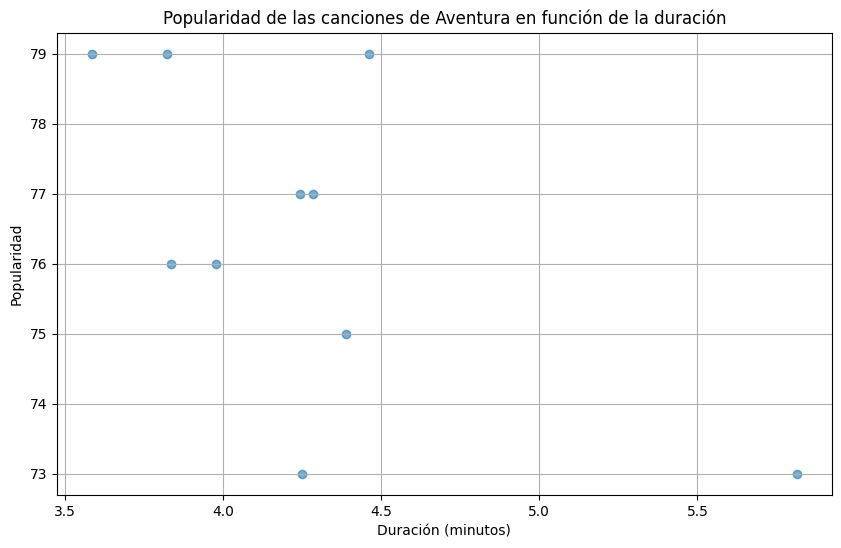

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df['duration_min'], df['popularity'], alpha=0.6)
plt.title('Popularidad de las canciones de Aventura en función de la duración')
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad')
plt.grid(True)
plt.show()

En esta gráfica podemos observar que la canción que más dura es la que mneos visitas tiene
y las que duran menos de 4:30/5 suelen ser las más escuchadas